# DESAFIO 2 - Grupo 5 

##  Nome dos integrantes do grupo

- Lider - Carlos Eduardo Souza (Cadu) / Stats
- Eleusa / Business
- Ronaldo Brags / Business
- Aruanã Cortez / Business
- Roberto Benatti / TI
- Shemi / Hebraico
- Rodrigo Castilho / Stats

**Perguntas (Parte Obrigatória - Grupo 5):**

***1) Tabelas com número de universidades públicas e privadas por estado e número de alunos por universidade***

Tabelas/Vars: DM_IES / TP_CATEGORIA_ADMINISTRATIVA + DM_ALUNO / Fazer um count dos alunos matriculados Chave: CO_IES Código único de identificação da IES

***2) Pergunta-se: é verdade que existe menos mulheres nos cursos de exatas? Explique com os dados.***

Tabelas/Vars: DM_ALUNO / TP_SEXO + DM_CURSO / CO_CURSO? NO_CURSO? Chave: CO_IES Código único de identificação da IES

***3) Quantos cursos novos abrem por ano?***

Tabelas/Vars: DM_CURSO / DT_INICIO_FUNCIONAMENTO

***4) Se usarmos a taxa de concluientes de um curso como variável de dificuldade dos cursos, eles tem ficado mais faceis ou mais duros ao longo do tempo? Quais as dificuldades para uma afirmação dessas?***

Tabelas/Vars: DM_CURSO/QT_CONCLUINTE_TOTAL + outras analises

***5) Rode uma regressão multipla que explique o abandono dos cursos, será que professores mais/menos preparados influência nessas taxas?***

Tabelas/Vars: DM_ALUNO/TP_SITUACAO + outras analises

***6) Quais os cursos com maior crescimento de matriculas por região? E quais os com maior queda? Como você explicaria isso.***

Tabelas/Vars: DM_CURSO/CO_UF - QT_MATRICULA_TOTAL - QT_INGRESSO_TOTAL

***7) Construa uma variável "Signo" dos estudantes e explique porque ela é correlacionada com a variável "probabilidade de formação" (construir)***

Tabelas/Vars: DM_ALUNO/DT_INGRESSO_CURSO - TP_FORMACAO (modelar)

**Importando as bibliotecas**

In [2]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

**Carregando os dados via banco de dados SQL lite**

In [3]:
desktop = os.path.join(os.path.expanduser("~"), "Desktop")
filePath_db = os.path.join(desktop, "Data Science/_Datasets/Desafio_2/Desafio_2A.db")
#filePath_db = os.path.join(desktop, "DIGITAL_HOUSE\Desafio_2A.db")

In [4]:
db = sqlite3.connect(filePath_db)

### Tabelas com número de universidades públicas e privadas por estado e número de alunos por universidade

In [5]:
#quantidade de IES em cada UF
UF_IES = ('''
                    select
                    CO_UF,
                    TP_CATEGORIA_ADMINISTRATIVA as TP_IES,
                    count(*) as QTDE_IES
                    from DM_IES
              group by CO_UF, TP_CATEGORIA_ADMINISTRATIVA
              ''')
df_ies = pd.read_sql_query(UF_IES,db)
df_ies.shape

(96, 3)

In [6]:
df_ies.head(30)

,CO_UF,TP_IES,QTDE_IES
0,11,4,1
1,11,5,9
2,12,1,1
3,13,1,2
4,13,4,2
5,13,5,4
6,14,1,2
7,15,1,1
8,15,2,1
9,15,4,3


In [7]:
#quantidade de alunos por tipo de IES em cada UF
UF_IES_ALUNOS = ('''
                    select
                    a.CO_UF,
                    a.TP_CATEGORIA_ADMINISTRATIVA as TP_IES,
                    count(*) as QTDE_ALUNOS
                    from DM_IES a
                         left join
                         DM_ALUNO b
                    on a.CO_IES = b.CO_IES
                   and a.TP_CATEGORIA_ADMINISTRATIVA = b.TP_CATEGORIA_ADMINISTRATIVA
              group by a.CO_UF, a.TP_CATEGORIA_ADMINISTRATIVA
              ''')
UF_IES_ALUNOS_Result = pd.read_sql_query(UF_IES_ALUNOS,db)
UF_IES_ALUNOS_Result

,CO_UF,TP_IES,QTDE_ALUNOS
0,11,4,251
1,11,5,15145
2,12,1,13737
3,13,1,36002
4,13,4,45032
5,13,5,28451
6,14,1,10795
7,15,1,8375
8,15,2,15325
9,15,4,35837


In [8]:
df_aluno = pd.read_sql_query(UF_IES_ALUNOS,db)
df_aluno.shape

(96, 3)

In [9]:
df_aluno.head()

,CO_UF,TP_IES,QTDE_ALUNOS
0,11,4,251
1,11,5,15145
2,12,1,13737
3,13,1,36002
4,13,4,45032


In [10]:
df_ies_alunos = df_ies.merge(df_aluno, on=['CO_UF','TP_IES'], how='left')
df_ies_alunos.shape

(96, 4)

In [11]:
df_ies_alunos.head()

,CO_UF,TP_IES,QTDE_IES,QTDE_ALUNOS
0,11,4,1,251
1,11,5,9,15145
2,12,1,1,13737
3,13,1,2,36002
4,13,4,2,45032


In [12]:
#filePath_uf = "C:\\Microdados_Educacao_Superior_2017\\DADOS\\UF.csv"
#uf = pd.DataFrame(pd.read_csv(filePath_uf, encoding='latin1', delimiter=';'))
#uf.shape

#uf = filePath_uf = os.path.join(desktop, "DIGITAL_HOUSE\\UF.csv")
#uf = pd.DataFrame(pd.read_csv(filePath_uf, encoding='latin1', delimiter=';'))
#uf.shape

filePath_uf = os.path.join(desktop, "Data Science/_Datasets/Desafio_2/UF.csv")
uf = pd.DataFrame(pd.read_csv(filePath_uf, encoding='latin1', delimiter=';'))
uf.shape

(27, 2)

In [13]:
uf.head()

,SIGLA_UF,CO_UF
0,RO,11
1,AC,12
2,AM,13
3,RR,14
4,PA,15


In [14]:
df_ies_alunos1 = df_ies_alunos.merge(uf, on='CO_UF', how='left')
df_ies_alunos1.shape

(96, 5)

In [15]:
df_ies_alunos1.head()

,CO_UF,TP_IES,QTDE_IES,QTDE_ALUNOS,SIGLA_UF
0,11,4,1,251,RO
1,11,5,9,15145,RO
2,12,1,1,13737,AC
3,13,1,2,36002,AM
4,13,4,2,45032,AM


In [16]:
serie1 = pd.Series([1, 2, 3, 4, 5, 6, 7])
serie2 = pd.Series(['Publica', 'Publica', 'Publica', 'Privada', 'Privada', 'Privada', 'Outras'])
df_tp_ies = pd.DataFrame({'TP_IES':serie1, 'DESCR_IES':serie2})
df_tp_ies 

,TP_IES,DESCR_IES
0,1,Publica
1,2,Publica
2,3,Publica
3,4,Privada
4,5,Privada
5,6,Privada
6,7,Outras


In [17]:
df_ies_alunos1 = df_ies_alunos1.merge(df_tp_ies, on='TP_IES', how='left')
df_ies_alunos1.shape

(96, 6)

In [18]:
df_ies_alunos1.head()

,CO_UF,TP_IES,QTDE_IES,QTDE_ALUNOS,SIGLA_UF,DESCR_IES
0,11,4,1,251,RO,Privada
1,11,5,9,15145,RO,Privada
2,12,1,1,13737,AC,Publica
3,13,1,2,36002,AM,Publica
4,13,4,2,45032,AM,Privada


In [19]:
df_final1 = pd.pivot_table(df_ies_alunos1,
                           index=['CO_UF', 'SIGLA_UF'],
                           columns='DESCR_IES',
                           values=['QTDE_IES','QTDE_ALUNOS'],
                           aggfunc='sum') #agregate function

**Quantidade de Universidades Públicas e Privadas por Estado e Quantidade de Alunos por Universidade**

In [20]:
df_final1

QTDE_ALUNOS                      QTDE_IES                
DESCR_IES           Outras    Privada   Publica   Outras Privada Publica
CO_UF SIGLA_UF                                                          
11    RO               NaN    15396.0       NaN      NaN    10.0     NaN
12    AC               NaN        NaN   13737.0      NaN     NaN     1.0
13    AM               NaN    73483.0   36002.0      NaN     6.0     2.0
14    RR               NaN        NaN   10795.0      NaN     NaN     2.0
15    PA               NaN    51896.0   23700.0      NaN     7.0     2.0
16    AP               NaN     8176.0   11634.0      NaN     3.0     1.0
17    TO               NaN    14933.0   12807.0      NaN     3.0     2.0
21    MA               NaN     4412.0   25424.0      NaN     5.0     1.0
22    PI               NaN    24359.0   20618.0      NaN     8.0     1.0
23    CE               NaN    90183.0   66809.0      NaN     9.0     4.0
24    RN               NaN    58672.0   12129.0      NaN     7.0     1.0
25    PB               NaN    34856.0   21359.0      NaN     9.0     1.0
26    PE            5361.0    55247.0   39448.0      7.0    21.0    17.0
27    AL               NaN    45121.0    8583.0      NaN    11.0     2.0
28    SE               NaN    83327.0   32209.0      NaN     6.0     1.0
29    BA               NaN   101792.0   54296.0      NaN    21.0     4.0
31    MG               NaN   309986.0   75173.0      NaN   120.0     9.0
32    ES               NaN    50493.0     803.0      NaN    23.0     2.0
33    RJ               NaN   835818.0   77381.0      NaN    69.0     8.0
35    SP            3052.0  1642492.0  190813.0      1.0   239.0    89.0
41    PR               NaN   253775.0   83233.0      NaN    43.0     8.0
42    SC               NaN   157638.0   27150.0      NaN    22.0     2.0
43    RS               NaN   396735.0   27891.0      NaN    41.0     2.0
50    MS               NaN   376207.0   31736.0      NaN    14.0     2.0
51    MT               NaN    61001.0   52219.0      NaN    14.0     2.0
52    GO               NaN    90109.0   48378.0      NaN    21.0     6.0
53    DF               NaN   132958.0   45240.0      NaN    18.0     1.0

### Pergunta-se: é verdade que existe menos mulheres nos cursos de exatas? Explique com os dados.

In [21]:
#quantidade de alunos por generp em cada area
GEN_AREA = ('''
                    select
                    CO_OCDE_AREA_GERAL,
                    TP_SEXO,                    
                    count(*) as QTDE_ALUNOS
                    from DM_ALUNO
                    WHERE CO_OCDE_AREA_GERAL in (4,5)
                group by CO_OCDE_AREA_GERAL, TP_SEXO
              ''')
GEN_AREA_Result = pd.read_sql_query(GEN_AREA,db)
GEN_AREA_Result

,CO_OCDE_AREA_GERAL,TP_SEXO,QTDE_ALUNOS
0,4,1,211812
1,4,2,477579
2,5,1,536656
3,5,2,1154011


In [22]:
df_gen_area = pd.read_sql_query(GEN_AREA,db)
df_gen_area.shape

(4, 3)

In [23]:
df_gen_area.head(20)

,CO_OCDE_AREA_GERAL,TP_SEXO,QTDE_ALUNOS
0,4,1,211812
1,4,2,477579
2,5,1,536656
3,5,2,1154011


In [24]:
#quantidade de IES em cada UF
DESCR_AREA = ('''
                    select
                    CO_OCDE_AREA_GERAL,
                    NO_OCDE_AREA_GERAL,
                    count(*) as qtde
                    from TB_AUX_AREA_OCDE
                    WHERE CO_OCDE_AREA_GERAL in (4,5)
                group by CO_OCDE_AREA_GERAL, NO_OCDE_AREA_GERAL
              ''')
DESCR_AREA_Result = pd.read_sql_query(DESCR_AREA,db)
DESCR_AREA_Result

,CO_OCDE_AREA_GERAL,NO_OCDE_AREA_GERAL,qtde
0,4,"Ciências, matemática e computação",125
1,5,"Engenharia, produção e construção",289


In [25]:
df_descr_area = pd.read_sql_query(DESCR_AREA,db)
df_descr_area.shape

(2, 3)

In [26]:
df_descr_area = df_descr_area.drop('qtde', 1)
df_descr_area.head()

,CO_OCDE_AREA_GERAL,NO_OCDE_AREA_GERAL
0,4,"Ciências, matemática e computação"
1,5,"Engenharia, produção e construção"


In [27]:
df_gen_area = df_gen_area.merge(df_descr_area, on='CO_OCDE_AREA_GERAL', how='left')

In [28]:
df_gen_area.head()

,CO_OCDE_AREA_GERAL,TP_SEXO,QTDE_ALUNOS,NO_OCDE_AREA_GERAL
0,4,1,211812,"Ciências, matemática e computação"
1,4,2,477579,"Ciências, matemática e computação"
2,5,1,536656,"Engenharia, produção e construção"
3,5,2,1154011,"Engenharia, produção e construção"


In [29]:
df_final2 = pd.pivot_table(df_gen_area,
                           index='NO_OCDE_AREA_GERAL',
                           columns='TP_SEXO',
                           values=['QTDE_ALUNOS'],
                           aggfunc='sum')

In [30]:
df_final2

QTDE_ALUNOS         
TP_SEXO                                     1        2
NO_OCDE_AREA_GERAL                                    
Ciências, matemática e computação      211812   477579
Engenharia, produção e construção      536656  1154011

**Cursos de exatas:**

- Ciências, matemática e computação -> Mulheres (1) = 211.812 / Homens (2) = 477.579
- Engenharia, produção e construção -> Mulheres (1) = 536.656 / Homens (2) = 1.154.011

Resultado:

**Mulheres: 748.468 / Homens: 1.631.590**

Existem mais homens do que mulheres em cursos de exatas.

### Quantos cursos novos abrem por ano?

In [31]:
# quantidade detalhada de cursos novos por ano
CURSOS_NOVOS_D = ('''
                    select
                    (substr(DT_INICIO_FUNCIONAMENTO,7,4)) as ANO_INICIO,
                    count(*) as QTDE_CURSOS
                    from DM_CURSO
                    where (substr(DT_INICIO_FUNCIONAMENTO,7,4)) > 0
                    group by DT_INICIO_FUNCIONAMENTO
              ''')
df = pd.read_sql_query(CURSOS_NOVOS_D,db)
df.head()

,ANO_INICIO,QTDE_CURSOS
0,1811,1
1,1899,2
2,1902,1
3,1910,1
4,1929,4


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QTDE_CURSOS,5384.0,6.396731,17.763544,1.0,1.0,2.0,4.0,276.0


In [33]:
# quantidade consolidada de cursos novos por ano
CURSOS_NOVOS_C = ('''
                    select
                    (case when substr(DT_INICIO_FUNCIONAMENTO,7,4) < '2000' then 'Sec. XIX-XX' else substr(DT_INICIO_FUNCIONAMENTO,7,4) end) as FX_INICIO,
                    count(*) as QTDE_CURSOS
                    from DM_CURSO
                    where (substr(DT_INICIO_FUNCIONAMENTO,7,4)) > 0
                    group by FX_INICIO
              ''')
CURSOS_NOVOS_C_Result = pd.read_sql_query(CURSOS_NOVOS_C, db)
CURSOS_NOVOS_C_Result

,FX_INICIO,QTDE_CURSOS
0,2000,932
1,2001,1021
2,2002,1195
3,2003,1123
4,2004,1303
5,2005,1389
6,2006,1891
7,2007,1728
8,2008,1619
9,2009,2117


In [34]:
df_cursos_novos = pd.read_sql_query(CURSOS_NOVOS_C,db)
df_cursos_novos.shape

(21, 2)

In [35]:
df_cursos_novos.FX_INICIO.fillna(value=pd.np.nan, inplace=True)
df_cursos_novos

,FX_INICIO,QTDE_CURSOS
0,2000,932
1,2001,1021
2,2002,1195
3,2003,1123
4,2004,1303
5,2005,1389
6,2006,1891
7,2007,1728
8,2008,1619
9,2009,2117


In [36]:
df_cursos_novos = df_cursos_novos.dropna(subset=['FX_INICIO'])
df_cursos_novos

,FX_INICIO,QTDE_CURSOS
0,2000,932
1,2001,1021
2,2002,1195
3,2003,1123
4,2004,1303
5,2005,1389
6,2006,1891
7,2007,1728
8,2008,1619
9,2009,2117


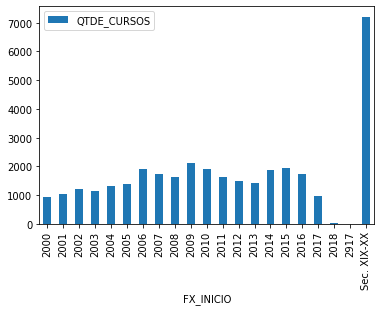

In [37]:
df_cursos_novos.plot.bar(x='FX_INICIO', y='QTDE_CURSOS');

São abertos, em média, 6,34 cursos por ano no Brasil.

### Se usarmos a taxa de concluintes de um curso como variável de dificuldade dos cursos, eles tem ficado mais fáceis ou mais duros ao longo do tempo? Quais as dificuldades para uma afirmação dessas?

In [38]:
QTDE_FORMADOS = ('''
                    select
                    (case when substr(DT_INICIO_FUNCIONAMENTO,7,4) < '2000' then 'Sec. XIX-XX' else substr(DT_INICIO_FUNCIONAMENTO,7,4) end) as FX_INICIO,
                    sum(QT_CONCLUINTE_TOTAL) as QTDE_FORMADOS,
                    QT_CONCLUINTE_TOTAL,
                    QT_MATRICULA_TOTAL,
                    (CAST(QT_CONCLUINTE_TOTAL as FLOAT) / CAST(QT_MATRICULA_TOTAL as FLOAT))* 100 as TX_FORMADOS
                    from DM_CURSO
                group by FX_INICIO
              ''')
df_tx_formados = pd.read_sql_query(QTDE_FORMADOS, db)
df_tx_formados.shape

(22, 5)

In [39]:
df_tx_formados.head(22)

,FX_INICIO,QTDE_FORMADOS,QT_CONCLUINTE_TOTAL,QT_MATRICULA_TOTAL,TX_FORMADOS
0,None,4939,0,81,0.000000
1,2000,35742,28,169,16.568047
2,2001,38076,26,172,15.116279
3,2002,41198,0,154,0.000000
4,2003,37392,0,0,NaN
5,2004,50530,71,247,28.744939
6,2005,53088,57,204,27.941176
7,2006,132120,27,150,18.000000
8,2007,105377,29,153,18.954248
9,2008,70822,15,166,9.036145


**Considerações:**
Faltam informações temporais para avaliar a evolução da taxa de formados. Pois o dataset é uma fotografia do ensino superio em 2017.

### Rode uma regressão multipla que explique o abandono dos cursos, será que professores mais/menos preparados influência nessas taxas?

**Considerações:**

**Desvinculado do curso** – aluno que, na data de referência do Censo, não possui vínculo
com o curso em decorrência de evasão, abandono, desligamento ou transferência
para outra IES.

**Ref.: modulo_aluno_2017.pdf**

Conclusão: considerado como "**abandono**" apenas a situação "**4. Desvinculado do curso**"
(DM_ALUNO -> TP_SITUACAO = 4)

In [40]:
ABANDONO = ('''
                    select
                    TP_TURNO as TURNO,
                    TP_GRAU_ACADEMICO as GRAU_ACADEMICO,
                    TP_MODALIDADE_ENSINO as MODALIDADE_ENSINO,
                    TP_CATEGORIA_ADMINISTRATIVA as CAT_ADMIN,
                    TP_SEXO as SEXO,
                    (case when TP_SITUACAO = 4 then 1 else 0 end) as ABANDONO
                    from DM_ALUNO
              ''')
df_abandono = pd.read_sql_query(ABANDONO,db)
df_abandono.shape

(11589194, 6)

In [41]:
df_abandono1 = df_abandono.dropna()
df_abandono1.shape

(8838634, 6)

In [42]:
df_abandono1.describe()

,TURNO,GRAU_ACADEMICO,MODALIDADE_ENSINO,CAT_ADMIN,SEXO,ABANDONO
count,8.838634e+06,8.838634e+06,8838634.0,8.838634e+06,8.838634e+06,8.838634e+06
mean,2.695902e+00,1.316055e+00,1.0,3.700547e+00,1.457983e+00,1.463756e-01
std,9.483890e-01,6.354059e-01,0.0,1.448549e+00,4.982315e-01,3.534823e-01
min,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,1.0,3.000000e+00,1.000000e+00,0.000000e+00
50%,3.000000e+00,1.000000e+00,1.0,4.000000e+00,1.000000e+00,0.000000e+00
75%,3.000000e+00,1.000000e+00,1.0,5.000000e+00,2.000000e+00,0.000000e+00
max,4.000000e+00,3.000000e+00,1.0,7.000000e+00,2.000000e+00,1.000000e+00


In [43]:
df_abandono1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8838634 entries, 0 to 11589193
Data columns (total 6 columns):
TURNO                float64
GRAU_ACADEMICO       float64
MODALIDADE_ENSINO    int64
CAT_ADMIN            int64
SEXO                 int64
ABANDONO             int64
dtypes: float64(2), int64(4)
memory usage: 472.0 MB


In [44]:
#df_abandono.dropna(how='any').head()

In [45]:
df_abandono1['ABANDONO'].value_counts()

0    7544874
1    1293760
Name: ABANDONO, dtype: int64

In [46]:
df_abandono2 = df_abandono1.sample(n=100000, random_state=43)

In [47]:
df_abandono2.head(10)

,TURNO,GRAU_ACADEMICO,MODALIDADE_ENSINO,CAT_ADMIN,SEXO,ABANDONO
1351578,3.0,2.0,1,4,1,0
10803766,3.0,1.0,1,4,2,0
2936504,3.0,1.0,1,5,1,0
9792051,3.0,1.0,1,4,1,0
6844378,2.0,1.0,1,5,1,0
1711403,3.0,1.0,1,5,2,0
1180880,3.0,1.0,1,4,1,0
1923307,4.0,1.0,1,5,1,0
10905564,3.0,1.0,1,4,1,0
7198263,3.0,1.0,1,5,2,0


In [48]:
df_abandono2.corr()

,TURNO,GRAU_ACADEMICO,MODALIDADE_ENSINO,CAT_ADMIN,SEXO,ABANDONO
TURNO,1.000000,-0.022997,NaN,-0.206862,0.071734,-0.026167
GRAU_ACADEMICO,-0.022997,1.000000,NaN,-0.111200,0.007228,0.049771
MODALIDADE_ENSINO,NaN,NaN,NaN,NaN,NaN,NaN
CAT_ADMIN,-0.206862,-0.111200,NaN,1.000000,-0.044525,0.047006
SEXO,0.071734,0.007228,NaN,-0.044525,1.000000,0.027800
ABANDONO,-0.026167,0.049771,NaN,0.047006,0.027800,1.000000


In [49]:
df_abandono3 = df_abandono2.drop(columns = ['MODALIDADE_ENSINO'])

In [50]:
df_abandono3.head()

,TURNO,GRAU_ACADEMICO,CAT_ADMIN,SEXO,ABANDONO
1351578,3.0,2.0,4,1,0
10803766,3.0,1.0,4,2,0
2936504,3.0,1.0,5,1,0
9792051,3.0,1.0,4,1,0
6844378,2.0,1.0,5,1,0


In [51]:
df_abandono3.corr()

,TURNO,GRAU_ACADEMICO,CAT_ADMIN,SEXO,ABANDONO
TURNO,1.000000,-0.022997,-0.206862,0.071734,-0.026167
GRAU_ACADEMICO,-0.022997,1.000000,-0.111200,0.007228,0.049771
CAT_ADMIN,-0.206862,-0.111200,1.000000,-0.044525,0.047006
SEXO,0.071734,0.007228,-0.044525,1.000000,0.027800
ABANDONO,-0.026167,0.049771,0.047006,0.027800,1.000000


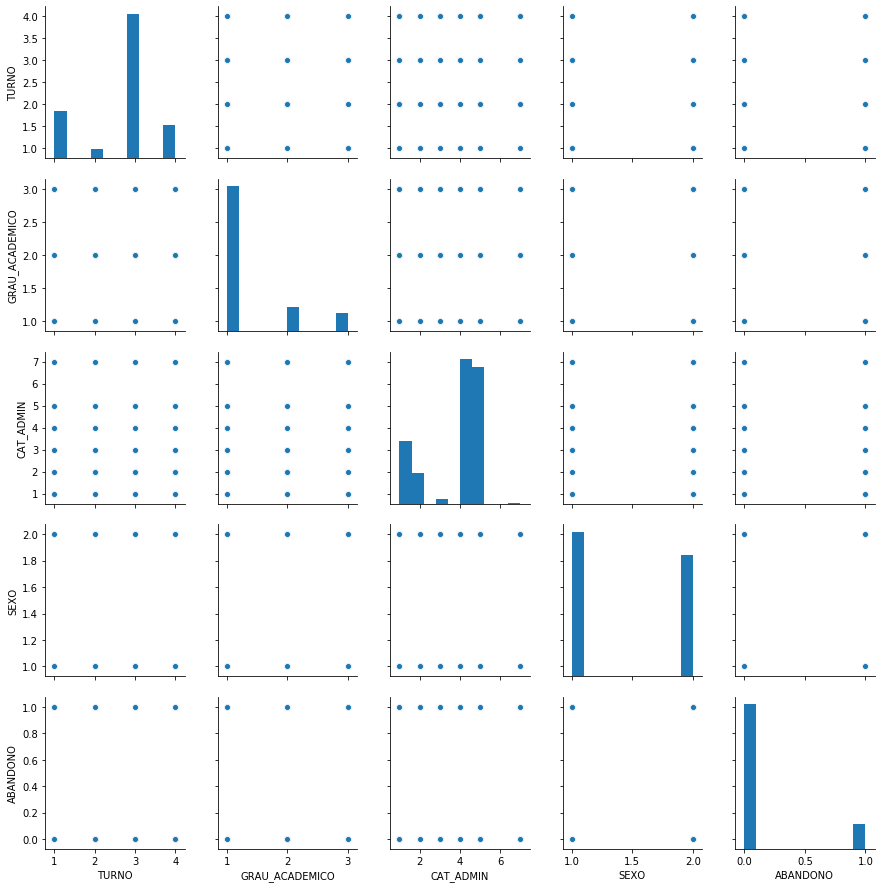

In [52]:
# Plotando o PAIRPLOT para todas as variáveis 
sns.pairplot(df_abandono3)

In [53]:
df_abandono3.dtypes

TURNO             float64
GRAU_ACADEMICO    float64
CAT_ADMIN           int64
SEXO                int64
ABANDONO            int64
dtype: object

In [54]:
list(df_abandono3)

['TURNO', 'GRAU_ACADEMICO', 'CAT_ADMIN', 'SEXO', 'ABANDONO']

In [55]:
# model = smf.ols('ABANDONO ~ ', df_abandono).fit() 
# Ex. logitfit = smf.logit(formula = xxx, data = df).fit()

function1 = '''ABANDONO ~
TURNO +
GRAU_ACADEMICO + 
CAT_ADMIN +
SEXO'''

model = smf.logit(formula = function1, data = df_abandono3).fit() 
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.411144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               ABANDONO   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99995
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Sep 2019   Pseudo R-squ.:                0.007683
Time:                        01:53:54   Log-Likelihood:                -41114.
converged:                       True   LL-Null:                       -41433.
Covariance Type:            nonrobust   LLR p-value:                1.814e-136
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5857      0.052    -49.467      0.000      -2.688      -2.483
TURNO            

In [56]:
df_abandono3['TURNO'] = df_abandono3['TURNO'].astype(int)

In [57]:
df_abandono3['GRAU_ACADEMICO'] = df_abandono3['GRAU_ACADEMICO'].astype(int)

In [58]:
df_abandono4 = pd.get_dummies(df_abandono3, columns=['TURNO','GRAU_ACADEMICO','CAT_ADMIN','SEXO'])
df_abandono4.head(10)

,ABANDONO,TURNO_1,TURNO_2,TURNO_3,TURNO_4,GRAU_ACADEMICO_1,GRAU_ACADEMICO_2,GRAU_ACADEMICO_3,CAT_ADMIN_1,CAT_ADMIN_2,CAT_ADMIN_3,CAT_ADMIN_4,CAT_ADMIN_5,CAT_ADMIN_7,SEXO_1,SEXO_2
1351578,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
10803766,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2936504,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
9792051,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
6844378,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1711403,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1180880,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
1923307,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
10905564,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
7198263,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


In [59]:
df_abandono4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1351578 to 9107445
Data columns (total 16 columns):
ABANDONO            100000 non-null int64
TURNO_1             100000 non-null uint8
TURNO_2             100000 non-null uint8
TURNO_3             100000 non-null uint8
TURNO_4             100000 non-null uint8
GRAU_ACADEMICO_1    100000 non-null uint8
GRAU_ACADEMICO_2    100000 non-null uint8
GRAU_ACADEMICO_3    100000 non-null uint8
CAT_ADMIN_1         100000 non-null uint8
CAT_ADMIN_2         100000 non-null uint8
CAT_ADMIN_3         100000 non-null uint8
CAT_ADMIN_4         100000 non-null uint8
CAT_ADMIN_5         100000 non-null uint8
CAT_ADMIN_7         100000 non-null uint8
SEXO_1              100000 non-null uint8
SEXO_2              100000 non-null uint8
dtypes: int64(1), uint8(15)
memory usage: 5.5 MB


In [60]:
df_abandono4.dtypes

ABANDONO            int64
TURNO_1             uint8
TURNO_2             uint8
TURNO_3             uint8
TURNO_4             uint8
GRAU_ACADEMICO_1    uint8
GRAU_ACADEMICO_2    uint8
GRAU_ACADEMICO_3    uint8
CAT_ADMIN_1         uint8
CAT_ADMIN_2         uint8
CAT_ADMIN_3         uint8
CAT_ADMIN_4         uint8
CAT_ADMIN_5         uint8
CAT_ADMIN_7         uint8
SEXO_1              uint8
SEXO_2              uint8
dtype: object

In [61]:
df_abandono4.describe().T

,count,mean,std,min,25%,50%,75%,max
ABANDONO,100000.0,0.14522,0.352324,0.0,0.0,0.0,0.0,1.0
TURNO_1,100000.0,0.20292,0.402175,0.0,0.0,0.0,0.0,1.0
TURNO_2,100000.0,0.03924,0.194166,0.0,0.0,0.0,0.0,1.0
TURNO_3,100000.0,0.61588,0.486389,0.0,0.0,1.0,1.0,1.0
TURNO_4,100000.0,0.14196,0.349011,0.0,0.0,0.0,0.0,1.0
GRAU_ACADEMICO_1,100000.0,0.77632,0.416712,0.0,1.0,1.0,1.0,1.0
GRAU_ACADEMICO_2,100000.0,0.12934,0.335578,0.0,0.0,0.0,0.0,1.0
GRAU_ACADEMICO_3,100000.0,0.09434,0.292303,0.0,0.0,0.0,0.0,1.0
CAT_ADMIN_1,100000.0,0.16563,0.371750,0.0,0.0,0.0,0.0,1.0
CAT_ADMIN_2,100000.0,0.08023,0.271650,0.0,0.0,0.0,0.0,1.0


In [62]:
list(df_abandono4)

['ABANDONO',
 'TURNO_1',
 'TURNO_2',
 'TURNO_3',
 'TURNO_4',
 'GRAU_ACADEMICO_1',
 'GRAU_ACADEMICO_2',
 'GRAU_ACADEMICO_3',
 'CAT_ADMIN_1',
 'CAT_ADMIN_2',
 'CAT_ADMIN_3',
 'CAT_ADMIN_4',
 'CAT_ADMIN_5',
 'CAT_ADMIN_7',
 'SEXO_1',
 'SEXO_2']

In [63]:
# model = smf.ols('ABANDONO ~ ', df_abandono).fit() 
# Ex. logitfit = smf.logit(formula = xxx, data = df).fit()

function1 = '''ABANDONO ~
 
 SEXO_1 
 
'''

model = smf.logit(formula = function1, data = df_abandono4).fit() 
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.413942
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.001     
Dependent Variable: ABANDONO         AIC:              82792.3797
Date:               2019-09-05 01:53 BIC:              82811.4055
No. Observations:   100000           Log-Likelihood:   -41394.   
Df Model:           1                LL-Null:          -41433.   
Df Residuals:       99998            LLR p-value:      1.6421e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
             Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -1.6888    0.0129  -130.7674  0.0000  -1.7142  -1.6635
SEXO_1      -0.1579    0.0180    -8.7855  0.0000  -0.1931  -0.

In [64]:
ABANDONO2 = ('''
                    select
                    CO_IES,
                    TP_CATEGORIA_ADMINISTRATIVA as CAT_IES,
                    TP_TURNO as TURNO,
                    CO_OCDE_AREA_GERAL as AREA_GERAL,
                    TP_GRAU_ACADEMICO as GRAU_ACADEMICO,
                    TP_MODALIDADE_ENSINO as MODALIDADE_ENSINO,
                    avg(NU_IDADE) as AVG_IDADE,
                    max(NU_IDADE) as MAX_IDADE,
                    min(NU_IDADE) as MIN_IDADE,
                    SUM((NU_IDADE-(SELECT AVG(NU_IDADE) FROM DM_ALUNO))*
                    (NU_IDADE-(SELECT AVG(NU_IDADE) FROM DM_ALUNO)) ) / (COUNT(NU_IDADE)-1) AS VAR_IDADE,
                    TP_NACIONALIDADE,
                    IN_INGRESSO_VESTIBULAR,
                    IN_INGRESSO_ENEM,
                    IN_FINANCIAMENTO_ESTUDANTIL,
                    IN_APOIO_SOCIAL,        
                    (case when TP_SITUACAO = 4 then 1 else 0 end) as TARGET
                    from DM_ALUNO
                    group by CO_IES, TP_CATEGORIA_ADMINISTRATIVA, TP_TURNO,
                    CO_OCDE_AREA_GERAL, TP_GRAU_ACADEMICO, TP_MODALIDADE_ENSINO, TP_NACIONALIDADE,
                    IN_INGRESSO_VESTIBULAR, IN_INGRESSO_ENEM, IN_FINANCIAMENTO_ESTUDANTIL,IN_APOIO_SOCIAL
               ''')
df_abandono5 = pd.read_sql_query(ABANDONO2,db)
df_abandono5.shape

(83601, 16)

In [65]:
df_abandono5.head()

,CO_IES,CAT_IES,TURNO,AREA_GERAL,GRAU_ACADEMICO,MODALIDADE_ENSINO,AVG_IDADE,MAX_IDADE,MIN_IDADE,VAR_IDADE,TP_NACIONALIDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FINANCIAMENTO_ESTUDANTIL,IN_APOIO_SOCIAL,TARGET
0,1,1,NaN,1.0,2.0,2,36.00000,36,36,NaN,1,0,0,None,0,0
1,1,1,NaN,1.0,2.0,2,34.53798,67,17,125.589933,1,1,0,None,0,0
2,1,1,NaN,1.0,2.0,2,31.00000,31,31,NaN,1,1,0,None,1,0
3,1,1,NaN,1.0,2.0,2,42.00000,49,35,517.646093,3,1,0,None,0,0
4,1,1,NaN,3.0,1.0,2,33.00000,33,33,NaN,1,0,0,None,0,0


In [66]:
FOR_DOCENTE = ('''
                    select
                    CO_IES,
                    (case when TP_ESCOLARIDADE = 1 then 1 else 0 end) as S_GRAD,
                    (case when TP_ESCOLARIDADE = 2 then 1 else 0 end) as GRAD,
                    (case when TP_ESCOLARIDADE = 3 then 1 else 0 end) as ESPEC,
                    (case when TP_ESCOLARIDADE = 4 then 1 else 0 end) as MESTR,
                    (case when TP_ESCOLARIDADE = 5 then 1 else 0 end) as DOUT,
                    (case when TP_ESCOLARIDADE = 4 then 1 
                          when TP_ESCOLARIDADE = 5 then 1 else 0 end) as MESTR_DOUT,
                    (case when TP_REGIME_TRABALHO = 1 then 1 
                          when TP_REGIME_TRABALHO = 2 then 1 else 0 end) as DED_EXCLUSIV
                    from DM_DOCENTE
                    where TP_SITUACAO = 1
                group by CO_IES
                
              ''')
df_docente = pd.read_sql_query(FOR_DOCENTE,db)
df_docente.shape

(2448, 8)

In [67]:
df_docente.head()

,CO_IES,S_GRAD,GRAD,ESPEC,MESTR,DOUT,MESTR_DOUT,DED_EXCLUSIV
0,1,0,0,0,0,1,1,1
1,2,0,0,0,0,1,1,0
2,3,0,0,0,0,1,1,0
3,4,0,0,0,1,0,1,1
4,5,0,0,1,0,0,0,1


In [68]:
#trazer as variaveis explicatórias
df_egr_doc = df_abandono5.merge(df_docente, on='CO_IES', how='left')
df_egr_doc.shape

(83601, 23)

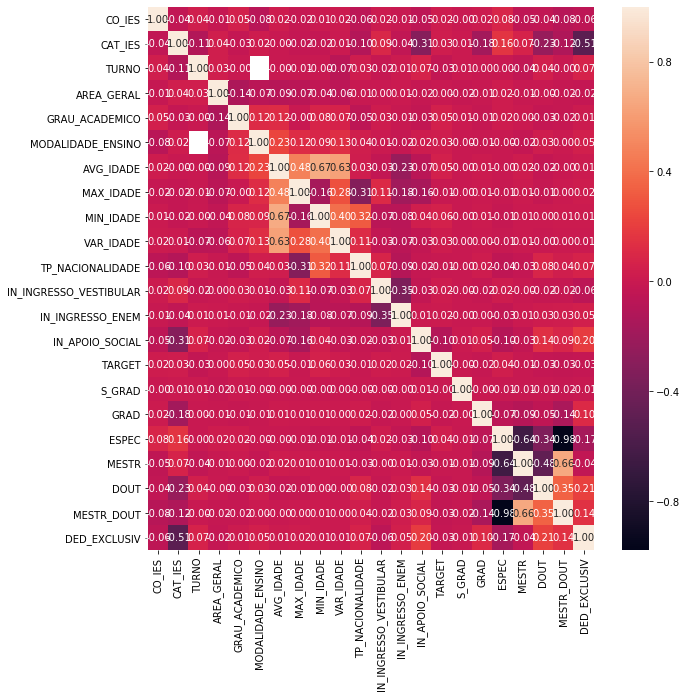

In [69]:
# plotando um Heatmap de correlações
import seaborn as sns

corr = df_egr_doc.corr()

fig, ax = plt.subplots(figsize=(10,10))
# plot the heatmap
sns.heatmap(corr, 
            fmt='.2f',
            xticklabels=corr.columns,
            yticklabels=corr.columns,annot=True,);

In [70]:
# Analisando a correlação de todas as variáveis em relação ao Y
# se o cliente comprou ou não o produto de Renda Fixa 

df_egr_doc.corr().round(2)['TARGET'].sort_values()

IN_APOIO_SOCIAL          -0.10
DED_EXCLUSIV             -0.03
DOUT                     -0.03
TURNO                    -0.03
MESTR_DOUT               -0.03
GRAD                     -0.02
MESTR                    -0.01
TP_NACIONALIDADE         -0.01
MAX_IDADE                -0.01
S_GRAD                   -0.00
AREA_GERAL                0.00
IN_INGRESSO_VESTIBULAR    0.02
IN_INGRESSO_ENEM          0.02
CO_IES                    0.02
VAR_IDADE                 0.03
MODALIDADE_ENSINO         0.03
CAT_IES                   0.03
ESPEC                     0.04
AVG_IDADE                 0.05
GRAU_ACADEMICO            0.05
MIN_IDADE                 0.06
TARGET                    1.00
Name: TARGET, dtype: float64

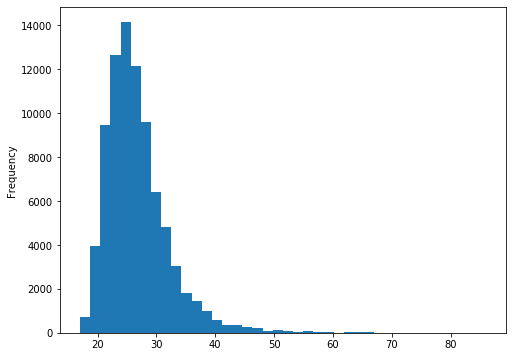

In [71]:
df_egr_doc.AVG_IDADE.plot.hist(bins=40, figsize=(8,6));

In [72]:
# Verificando as porcentagens de cada classe da variável target
df_egr_doc['TARGET'].value_counts(normalize=True)

0    0.847849
1    0.152151
Name: TARGET, dtype: float64

In [73]:
#NIVEL, CAT_IES, TURNO, AREA_GERAL, GRAU_ACADEMICO, MODALIDADE_ENSINO, TP_NACIONALIDADE
df_egr_doc.CAT_IES.value_counts()

4    36375
5    31293
1    10656
2     4048
3     1074
7      155
Name: CAT_IES, dtype: int64

In [74]:
#NIVEL, CAT_IES, TURNO, AREA_GERAL, GRAU_ACADEMICO, MODALIDADE_ENSINO, TP_NACIONALIDADE
df_egr_doc.AREA_GERAL.value_counts()

3.0    23795
7.0    12731
5.0    12089
1.0    10968
4.0    10367
2.0     4911
8.0     4527
6.0     3777
Name: AREA_GERAL, dtype: int64

In [75]:
df_egr_doc.TP_NACIONALIDADE.value_counts()

1    72887
3     7267
2     3447
Name: TP_NACIONALIDADE, dtype: int64

In [76]:
#NIVEL, CAT_IES, TURNO, AREA_GERAL, GRAU_ACADEMICO, MODALIDADE_ENSINO, TP_NACIONALIDADE
df_egr_doc.GRAU_ACADEMICO.value_counts()

1.0    54767
3.0    17420
2.0    10888
Name: GRAU_ACADEMICO, dtype: int64

In [77]:
#NIVEL, CAT_IES, TURNO, AREA_GERAL, GRAU_ACADEMICO, MODALIDADE_ENSINO, TP_NACIONALIDADE
df_egr_doc.MODALIDADE_ENSINO.value_counts()

1    79656
2     3945
Name: MODALIDADE_ENSINO, dtype: int64

In [78]:
#NIVEL, CAT_IES, TURNO, AREA_GERAL, GRAU_ACADEMICO, MODALIDADE_ENSINO, TP_NACIONALIDADE
df_egr_doc.TURNO.value_counts()

3.0    46842
1.0    19415
4.0     8536
2.0     4863
Name: TURNO, dtype: int64

In [79]:
df5 = pd.get_dummies(df_egr_doc, columns=['MODALIDADE_ENSINO', 'GRAU_ACADEMICO', 'CAT_IES', 'TP_NACIONALIDADE', 'AREA_GERAL', 'TURNO'])
df5.head()

,CO_IES,AVG_IDADE,MAX_IDADE,MIN_IDADE,VAR_IDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FINANCIAMENTO_ESTUDANTIL,IN_APOIO_SOCIAL,TARGET,...,AREA_GERAL_3.0,AREA_GERAL_4.0,AREA_GERAL_5.0,AREA_GERAL_6.0,AREA_GERAL_7.0,AREA_GERAL_8.0,TURNO_1.0,TURNO_2.0,TURNO_3.0,TURNO_4.0
0,1,36.00000,36,36,NaN,0,0,None,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,34.53798,67,17,125.589933,1,0,None,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.00000,31,31,NaN,1,0,None,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,42.00000,49,35,517.646093,1,0,None,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,33.00000,33,33,NaN,0,0,None,0,0,...,1,0,0,0,0,0,0,0,0,0


In [80]:
list(df5.columns)

['CO_IES',
 'AVG_IDADE',
 'MAX_IDADE',
 'MIN_IDADE',
 'VAR_IDADE',
 'IN_INGRESSO_VESTIBULAR',
 'IN_INGRESSO_ENEM',
 'IN_FINANCIAMENTO_ESTUDANTIL',
 'IN_APOIO_SOCIAL',
 'TARGET',
 'S_GRAD',
 'GRAD',
 'ESPEC',
 'MESTR',
 'DOUT',
 'MESTR_DOUT',
 'DED_EXCLUSIV',
 'MODALIDADE_ENSINO_1',
 'MODALIDADE_ENSINO_2',
 'GRAU_ACADEMICO_1.0',
 'GRAU_ACADEMICO_2.0',
 'GRAU_ACADEMICO_3.0',
 'CAT_IES_1',
 'CAT_IES_2',
 'CAT_IES_3',
 'CAT_IES_4',
 'CAT_IES_5',
 'CAT_IES_7',
 'TP_NACIONALIDADE_1',
 'TP_NACIONALIDADE_2',
 'TP_NACIONALIDADE_3',
 'AREA_GERAL_1.0',
 'AREA_GERAL_2.0',
 'AREA_GERAL_3.0',
 'AREA_GERAL_4.0',
 'AREA_GERAL_5.0',
 'AREA_GERAL_6.0',
 'AREA_GERAL_7.0',
 'AREA_GERAL_8.0',
 'TURNO_1.0',
 'TURNO_2.0',
 'TURNO_3.0',
 'TURNO_4.0']

In [81]:
# Definindo a função da regressão
function5 = '''
 TARGET ~  
 + AVG_IDADE
 + IN_INGRESSO_VESTIBULAR
 + IN_INGRESSO_ENEM
 + IN_FINANCIAMENTO_ESTUDANTIL
 + IN_APOIO_SOCIAL
 + MESTR_DOUT
 + DED_EXCLUSIV
 + MODALIDADE_ENSINO_1
 + CAT_IES_1
 + CAT_IES_2
 + CAT_IES_3
 + CAT_IES_4
 + CAT_IES_5
 + CAT_IES_7
 + TP_NACIONALIDADE_1
 + TP_NACIONALIDADE_2
 + TP_NACIONALIDADE_3
 '''

In [82]:
# Instanciando e ajustando o modelo
model1 = smf.ols(function5, df5).fit()
# Imprimindo os resultados
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     239.2
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:54:45   Log-Likelihood:                -26849.
No. Observations:               68687   AIC:                         5.373e+04
Df Residuals:                   68672   BIC:                         5.387e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [93]:
df5_1 = df5[['TARGET','AVG_IDADE','IN_INGRESSO_VESTIBULAR','IN_INGRESSO_ENEM',
             'IN_FINANCIAMENTO_ESTUDANTIL','IN_APOIO_SOCIAL','MESTR_DOUT','DED_EXCLUSIV',
             'MODALIDADE_ENSINO_1']].sample(n=10000, random_state=1)

In [94]:
df5_1.shape

(10000, 9)

In [95]:
df5_1.isnull().sum().sort_values(ascending=False)

IN_FINANCIAMENTO_ESTUDANTIL    1769
MODALIDADE_ENSINO_1               0
DED_EXCLUSIV                      0
MESTR_DOUT                        0
IN_APOIO_SOCIAL                   0
IN_INGRESSO_ENEM                  0
IN_INGRESSO_VESTIBULAR            0
AVG_IDADE                         0
TARGET                            0
dtype: int64

In [96]:
df5_1['IN_FINANCIAMENTO_ESTUDANTIL'].fillna(df5_1['IN_FINANCIAMENTO_ESTUDANTIL'].median(), inplace=True)
df5_1['IN_FINANCIAMENTO_ESTUDANTIL'].value_counts(dropna=False).nlargest(7)

0      4434
1      3797
0.0    1769
Name: IN_FINANCIAMENTO_ESTUDANTIL, dtype: int64

In [97]:
df5_1.isnull().sum().sort_values(ascending=False)

MODALIDADE_ENSINO_1            0
DED_EXCLUSIV                   0
MESTR_DOUT                     0
IN_APOIO_SOCIAL                0
IN_FINANCIAMENTO_ESTUDANTIL    0
IN_INGRESSO_ENEM               0
IN_INGRESSO_VESTIBULAR         0
AVG_IDADE                      0
TARGET                         0
dtype: int64

In [98]:
# Definindo a função da regressão
function6 = '''
 TARGET ~  
 + AVG_IDADE
 + IN_INGRESSO_VESTIBULAR
 + IN_INGRESSO_ENEM
 + IN_FINANCIAMENTO_ESTUDANTIL
 + IN_APOIO_SOCIAL
 + MESTR_DOUT
 + DED_EXCLUSIV
 + MODALIDADE_ENSINO_1
 '''

In [99]:
# Instanciando e ajustando o modelo
model2 = smf.logit(function6, df5_1).fit()
# Imprimindo os resultados
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.405073
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 05 Sep 2019   Pseudo R-squ.:                 0.05368
Time:                        01:58:25   Log-Likelihood:                -4050.7
converged:                       True   LL-Null:                       -4280.5
Covariance Type:            nonrobust   LLR p-value:                 2.653e-93
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.0226      0.244     -8.28

In [100]:
# fazendo predições com o último modelo de regressão logística ajustado
y_predict = model2.predict()
print(y_predict)

[0.10103639 0.20957332 0.08194768 ... 0.31269691 0.08565078 0.08072931]


In [101]:
y_predict.shape

(10000,)

In [102]:
# calculando os resultados da matriz de confusão com o Pandas_ml

import pandas as pd
from pandas_ml import ConfusionMatrix

Confusion_Matrix = ConfusionMatrix(df5_1.TARGET, y_predict)
Confusion_Matrix.print_stats()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Applications/anaconda3/lib/python3.7/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/Applications/anaconda3/lib/python3.7/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Applications/anaconda3/lib/python3.7/site-packages/pandas_ml/confusion_matrix/bcm.py:267: Runti

Confusion Matrix:

Predicted             0.0  0.027569954378243538  0.028624988182172677  \
Actual                                                                  
0.0                     0                     1                     1   
0.027569954378243538    0                     0                     0   
0.028624988182172677    0                     0                     0   
0.02915461125162214     0                     0                     0   
0.029388085942219096    0                     0                     0   
0.029860486434804916    0                     0                     0   
0.030212421177286928    0                     0                     0   
0.030275449236802452    0                     0                     0   
0.03034024318816163     0                     0                     0   
0.030783940925201037    0                     0                     0   
0.03125543074481197     0                     0                     0   
0.03133846793335784     0       

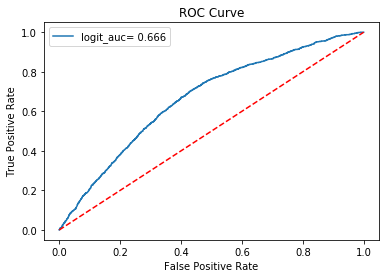

In [103]:
# plotando uma curva ROC e calculando a AUC
# utilizando os valores da série y original e os valores probabilísticos de resultado

from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds = roc_curve(df5_1.TARGET.values,model2.predict())

logit_auc = roc_auc_score(df5_1.TARGET.values,model2.predict())

plt.plot(fpr,tpr,label='logit_auc= %0.3f'%logit_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

A formação do docente tem pouca capacidade de explicar o abandono dos alunos.

### Quais os cursos com maior crescimento de matriculas por região? E quais os com maior queda? Como você explicaria isso.

In [ ]:
MATR_REG = ('''
                    select
                    b.NO_OCDE_AREA_GERAL as CURSOS,
                    (case when a.CO_UF in (11,12,13,14,15,16,17) then 'NORTE'
                          when a.CO_UF in (21,22,23,24,25,26,27,28,29) then 'NORDESTE'
                          when a.CO_UF in (31,32,33,35) then 'SUDESTE'
                          when a.CO_UF in (41,42,43) then 'SUL'
                          when a.CO_UF in (50,51,52,53) then 'CENTRO_OESTE' end) as REGIAO,
                    sum(a.QT_MATRICULA_TOTAL) as MATRICULADOS,
                    sum(a.QT_CONCLUINTE_TOTAL) as FORMANDOS,
                    sum(a.QT_INGRESSO_TOTAL) as INGRESSO_TOTAL,
                    sum(a.QT_INGRESSO_VAGA_NOVA) as INGRESSO_VAGA_NOVA,
                    sum(a.QT_VAGA_TOTAL) as VAGAS_TOTAIS,
                    sum(a.QT_INGRESSO_VAGA_NOVA) /sum (QT_VAGA_TOTAL) as TAXA_MATRICULAS
                    from DM_CURSO a
                    left join TB_AUX_AREA_OCDE b
                    on a.CO_OCDE_AREA_GERAL = b.CO_OCDE_AREA_GERAL
                    where a.CO_UF > 0 and a.CO_OCDE_AREA_GERAL > 0
                    group by NO_OCDE_AREA_GERAL, REGIAO
              ''')
df_matr_reg = pd.read_sql_query(MATR_REG,db)
df_matr_reg.shape

In [ ]:
df_matr_reg.head(20)

In [ ]:
df_matr_reg.isnull().sum().sort_values(ascending=False)

In [ ]:
df_matr_reg.describe().T

In [ ]:
df_matr_reg['TAXA_MATRICULAS'] = df_matr_reg.apply(lambda row: (
    (row['INGRESSO_VAGA_NOVA'] / row['VAGAS_TOTAIS'])), axis=1)

In [ ]:
df_matr_reg.head()

In [ ]:
df_matr_reg.describe().T

In [ ]:
df_final6 = pd.pivot_table(df_matr_reg,
                           index=['CURSOS','REGIAO'],
                           values=['TAXA_MATRICULAS'],
                           aggfunc= {'TAXA_MATRICULAS': ['sum']})

In [ ]:
df_final6

A comparação entre a taxa de matriculas é dada no ano de 2017 não é possível comparar variação entre períodos para afirmar se houve crescimento ou decrescimento.

### Construa uma variável "Signo" dos estudantes e explique porque ela é correlacionada com a variável "probabilidade de formação" (construir)

In [ ]:
# Estabelecendo conexao com banco de dados
db = sqlite3.connect(r'C:/Users/rco1/Desktop/Digital House/2. Analise Exploratória Intermediaria/99. Desafio 2/DADOS/alunos.db')

# Buscando dia, mes e ano de nascimento dos alunos que tenham situacao em codigo 4 (desvinculado) ou 6 (concluido)
query = 'SELECT TP_SITUACAO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_ANO_NASCIMENTO FROM DM_ALUNO WHERE TP_SITUACAO IN (4,6)'

# Associando query a um dataframe
dfSigno = pd.read_sql_query(query, db)

In [ ]:
# Estabelecendo conexão com o Banco de Dados
dfSigno_INI = ('''  select
                    a.TP_SITUACAO,
                    a.NU_MES_NASCIMENTO,
                    a.NU_DIA_NASCIMENTO,
                    a.NU_ANO_NASCIMENTO
                    from DM_ALUNO a
                WHERE TP_SITUACAO IN (4,6)
                ''')
dfSigno = pd.read_sql_query(dfSigno_INI,db)
dfSigno.head(3)

In [ ]:
dfSigno.info()

In [ ]:
# Criando procedimento para apurar signo

lista_signos = []

def signo_zodiaco(dia, mes): 
    if mes == 12: 
        signo = 'Sagitario' if (dia < 22) else 'Capricornio'
          
    elif mes == 1: 
        signo = 'Capricornio' if (dia < 20) else 'Aquario'
          
    elif mes == 2: 
        signo = 'Aquario' if (dia < 19) else 'Peixes'
          
    elif mes == 3: 
        signo = 'Peixes' if (dia < 21) else 'Aries'
          
    elif mes == 4: 
        signo = 'Aries' if (dia < 20) else 'Touro'
          
    elif mes == 5: 
        signo = 'Touro' if (dia < 21) else 'Gemeos'
          
    elif mes == 6: 
        signo = 'Gemeos' if (dia < 21) else 'Cancer'
          
    elif mes == 7: 
        signo = 'Cancer' if (dia < 23) else 'Leao'
          
    elif mes == 8: 
        signo = 'Leao' if (dia < 23) else 'Virgem'
          
    elif mes == 9: 
        signo = 'Virgem' if (dia < 23) else 'Libra'
          
    elif mes == 10: 
        signo = 'Libra' if (dia < 23) else 'Escorpiao'
          
    elif mes == 11: 
        signo = 'Escorpiao' if (dia < 22) else 'Sagitario'
        
    lista_signos.append(signo)

# Procedimento para gerar os signos em nova coluna
    
for dia,mes in zip(dfSigno['NU_DIA_NASCIMENTO'], dfSigno['NU_MES_NASCIMENTO']):
    signo_zodiaco(dia,mes)
    
dfSigno['Signo'] = lista_signos
dfSigno.head()

In [ ]:
# procedimento de colocar tag entre concluido ou nao
def label_concluido (row):
    if row['TP_SITUACAO'] == 6:
        return 'Concluido'
    else:
        return 'Desvinculado'

# Aplicando as tags
dfSigno['TP_SITUACAO'] = dfSigno.apply (lambda row: label_concluido(row), axis=1)
dfSigno.head()

In [ ]:
#gerando dataframe somente de signos e situacao com contador

df_final = pd.DataFrame({'Situacao': dfSigno['TP_SITUACAO'],'Signo':dfSigno['Signo']})
df_final['Contador'] = 1
df_final.head()

In [ ]:
# Gerando pivot com os dados que interessam
df1=pd.pivot_table(df_final, columns=['Situacao'], index=['Signo'], aggfunc=np.sum).fillna(0)
df1

In [ ]:
# Jogando a pivot para novo dataframe a ser trabalhado
df_conclusivo = pd.DataFrame(df1.to_records())
df_conclusivo

In [ ]:
# Removendo atributos desnecessarios dos titulos de coluna
df_conclusivo.rename(columns={"('Contador', 'Concluido')": "Concluido", "('Contador', 'Desvinculado')": "Desvinculado"}, 
                     inplace=True)
df_conclusivo

In [ ]:
# Criando a taxa de conclusao por signo

df_conclusivo['Taxa_Conclusao'] = df_conclusivo['Concluido'] / df_conclusivo['Total']
df_conclusivo

In [ ]:
df_conclusivo.describe()

In [ ]:
df_conclusivo.groupby('Signo')['Taxa_Conclusao'].size().plot();

In [ ]:
ax2 = df_conclusivo.plot.bar(x='Signo', y='Taxa_Conclusao', color='blue', alpha=0.5, figsize=(10,7))
plt.title('Taxa de Conclusao por signo', size=24)
plt.xlabel('Signo', size=18)
plt.ylabel('Taxa de Conclusao', size=18);

**Conclusão: Signo e Taxa de Conclusão não possuem nenhuma correlação relevante.**